In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df = df.iloc[:,2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df["EstimatedSalary"] = df["EstimatedSalary"]*10000

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df.drop("Purchased",axis=1),df['Purchased'],test_size=0.25,random_state=42)

In [7]:
X_train.shape,X_test.shape

((300, 2), (100, 2))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [10]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,300.0,3.000000e+02
mean,37.7,6.990000e+08
std,10.2,3.429086e+08
min,18.0,1.500000e+08
25%,30.0,4.300000e+08
50%,37.0,7.050000e+08
75%,45.0,8.800000e+08
max,60.0,1.500000e+09


In [11]:

np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


### Scaling in graph

Text(0.5, 1.0, 'Before Scaling')

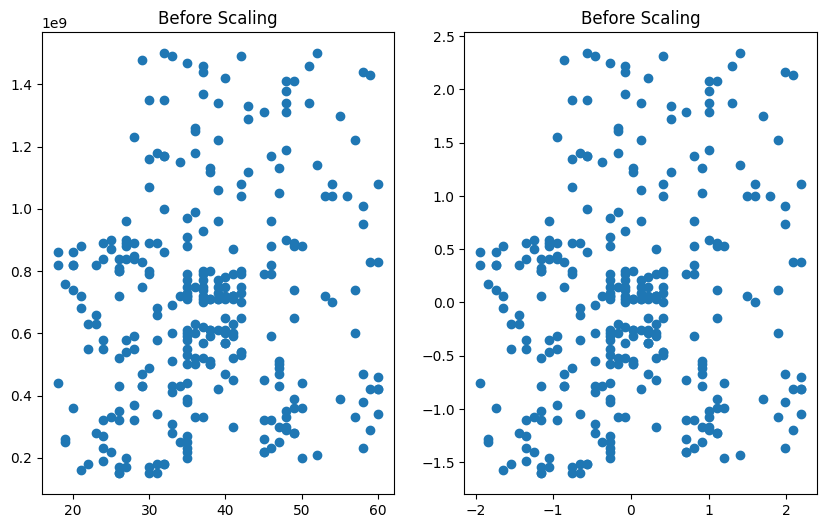

In [12]:
fig,axes=plt.subplots(1,2,figsize=(10,6))

axes[0].scatter(X_train["Age"],X_train["EstimatedSalary"])
axes[0].set_title("Before Scaling")
axes[1].scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])
axes[1].set_title("Before Scaling")

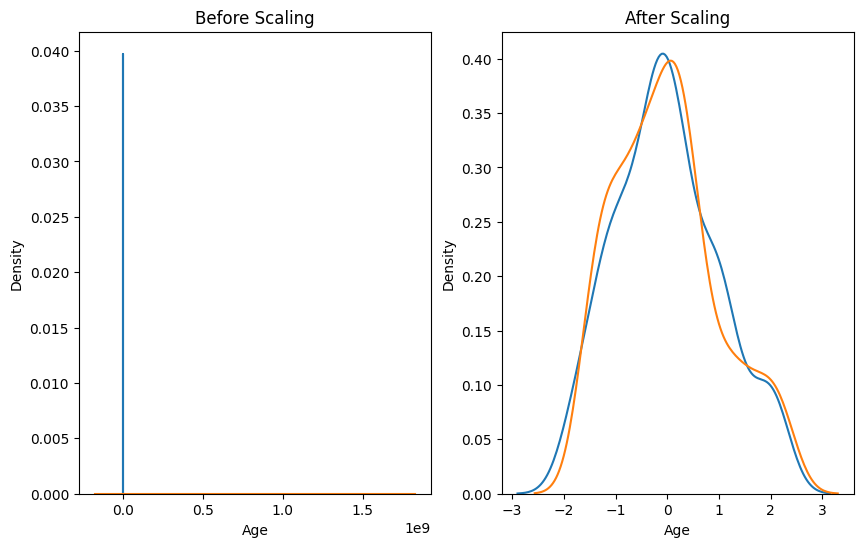

In [13]:
fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"])
sns.kdeplot(X_train_scaled["EstimatedSalary"])
plt.show()

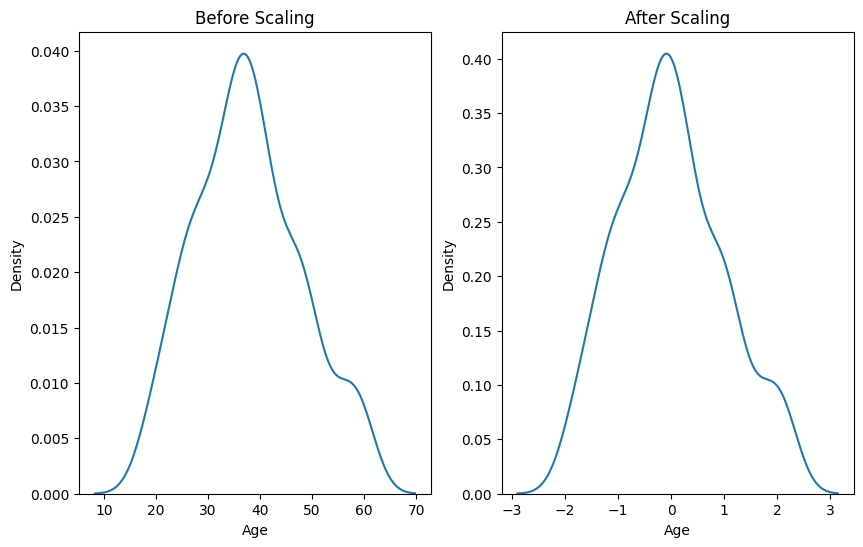

In [14]:
# age column kde plot before and after scaling

fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"])
plt.show()





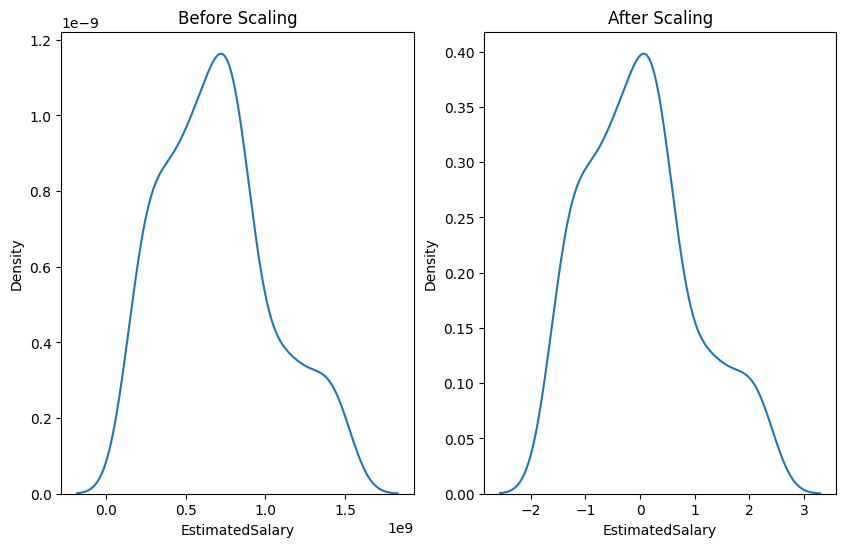

In [15]:
# with salary column

fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"])
plt.show()

### Why scaling is important

In [16]:
# applying logistic regression before scaling and after scaling

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)





LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score


In [19]:
print("Accuracy before scaling : ",accuracy_score(Y_test,y_pred))
print("Accuracy after scaling : ",accuracy_score(Y_test,y_pred_scaled))

Accuracy before scaling :  0.63
Accuracy after scaling :  0.86


### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Accuracy before scaling : ",accuracy_score(Y_test,y_pred))
print("Accuracy after scaling : ",accuracy_score(Y_test,y_pred_scaled))

Accuracy before scaling :  0.84
Accuracy after scaling :  0.83


In [ ]:
# it shows that some algorithms effect from standrization or some is not .

### Effect of Outliers

In [27]:
df = pd.concat((df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000*10000,250000*10000,350000*10000],'Purchased':[0,1,1]})),ignore_index=True)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

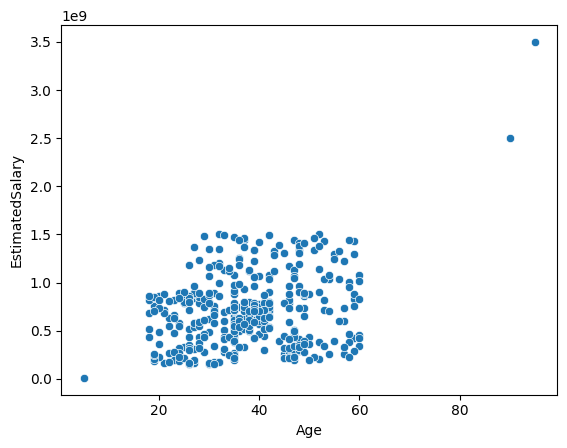

In [29]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df)

In [30]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((322, 2), (81, 2))

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

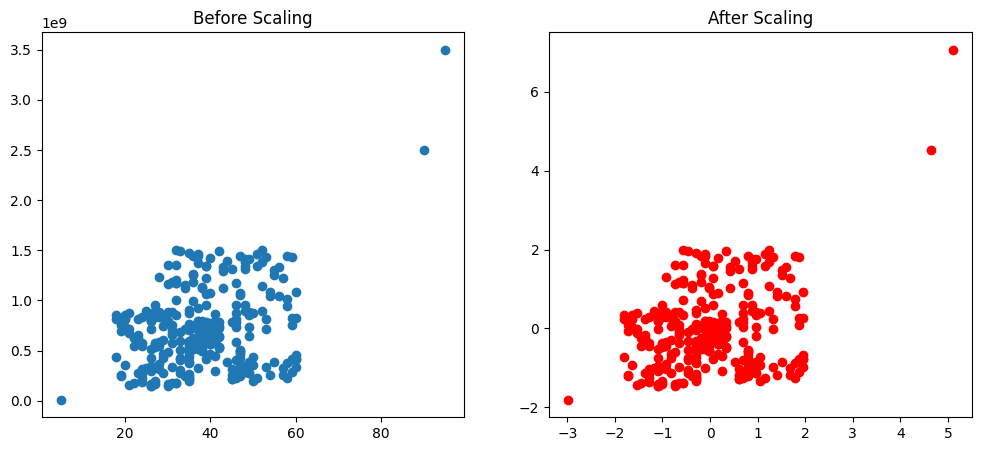

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

### Standrization or Z score normalization do not handle outliers
